In [2]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import os
import re

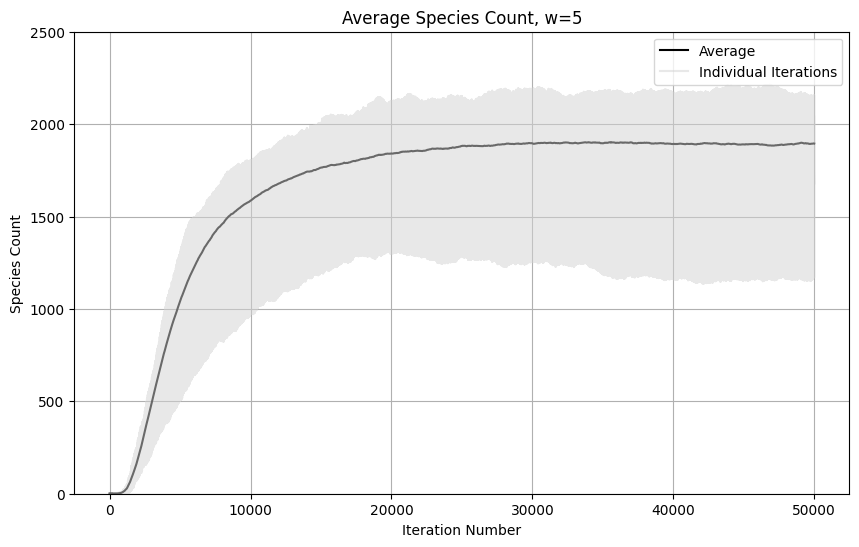

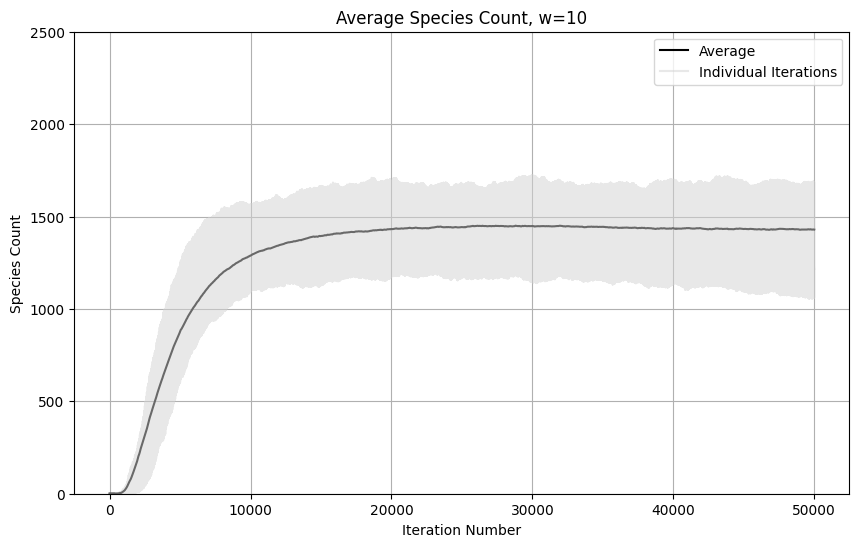

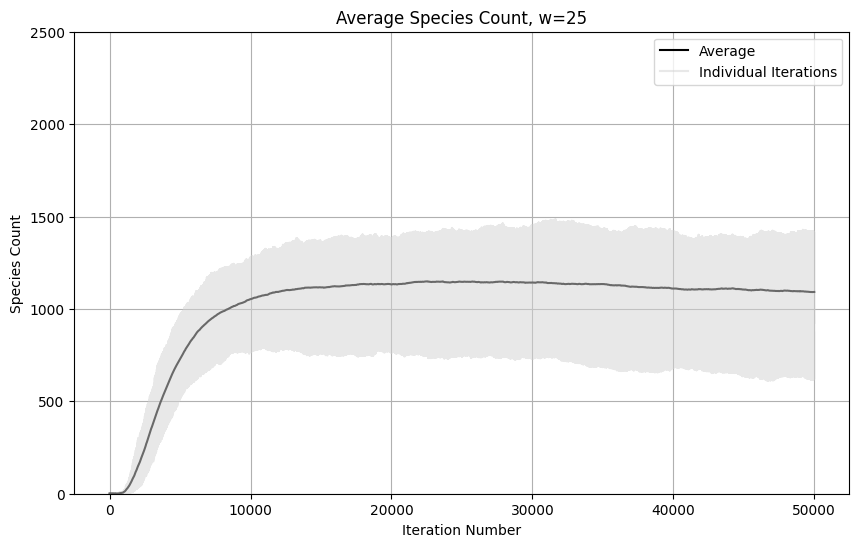

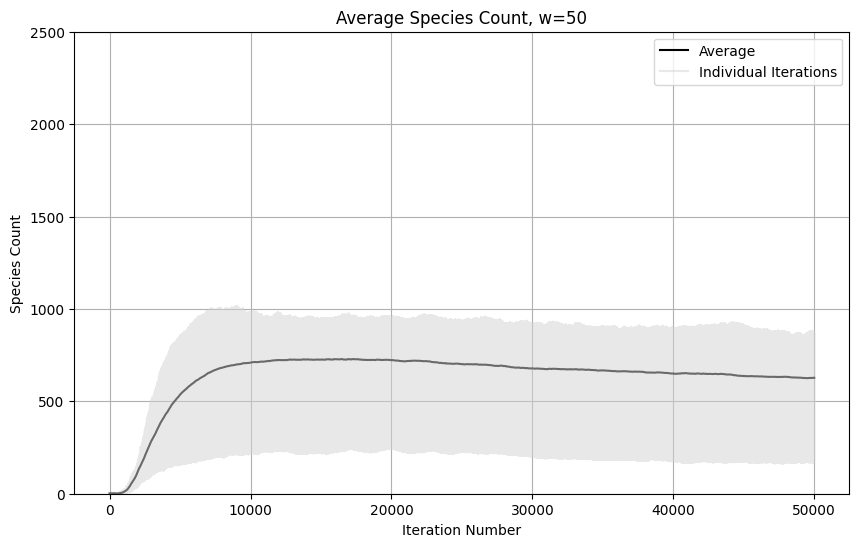

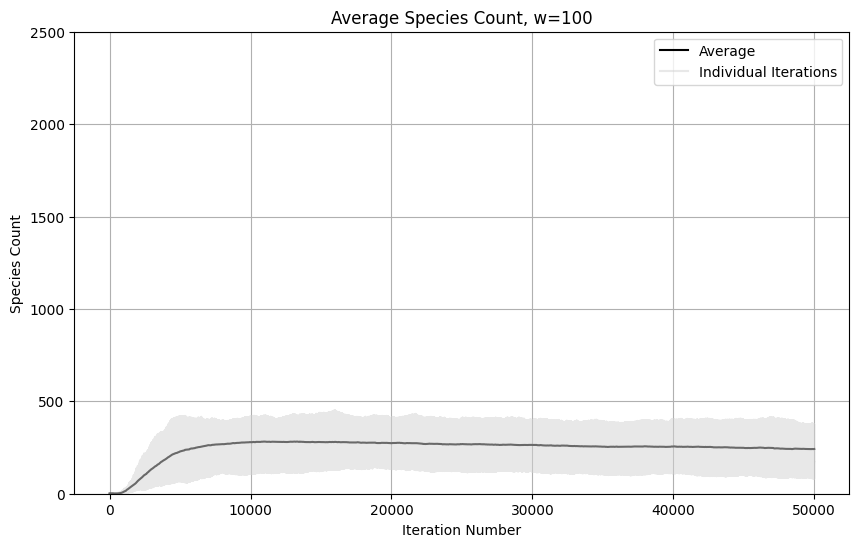

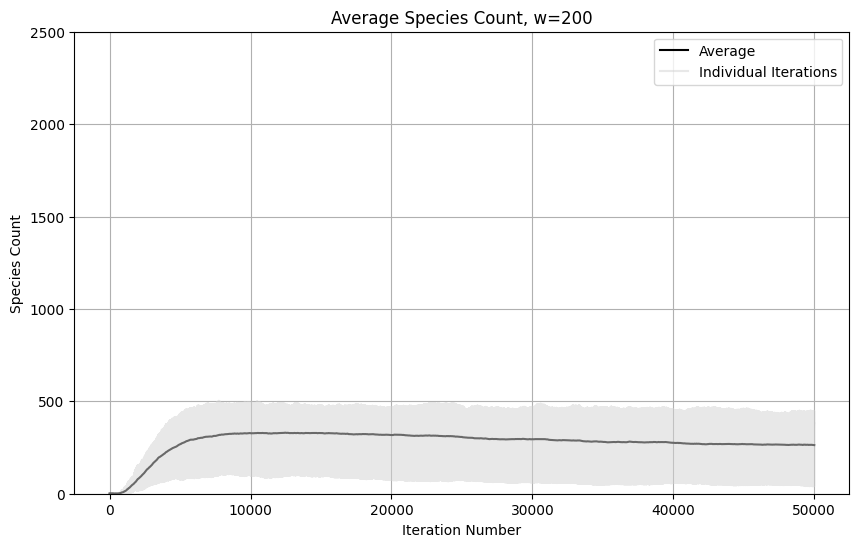

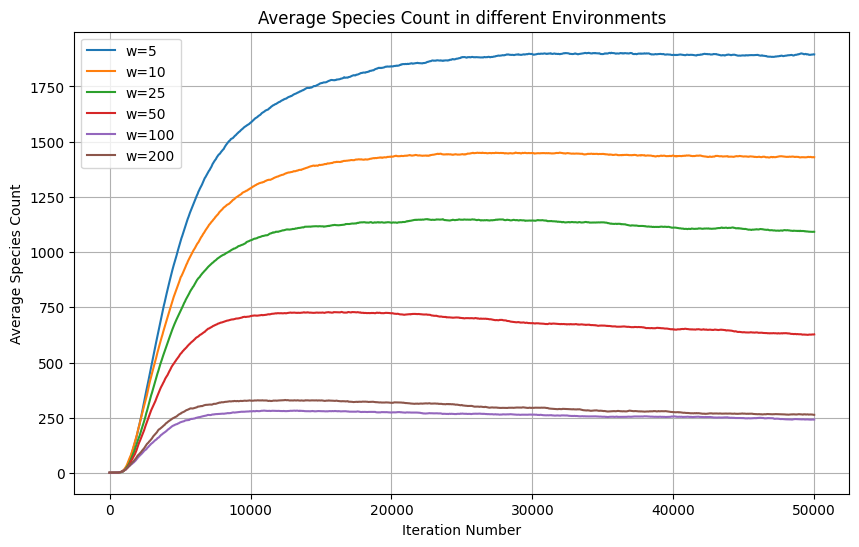

In [34]:
#Define the folders containing the csv files
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over100/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over200/mh',]
# Define folder labels
folder_labels = ['w=5', 'w=10', 'w=25', 'w=50', 'w=100', 'w=200']

# Create a list to store average DataFrames for each folder
average_dataframes = []

# Loop trhough the folders
for i, folder_path in enumerate(folder_paths):
 
    # create a list to store individual DataFrames
    dataframes = []

    #Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5], names=['Iteration_number', 'Species_count'])
            dataframes.append(df)
            
            # Print column names for each file
            # print(f"Columns in {filename}: {df.columns}")

    # Concatenate all DataFrames into one
    all_data = pd.concat(dataframes, ignore_index=True)
    #Sort the DataFrame by 'Iteration_number'
    all_data = all_data.sort_values(by='Iteration_number')

    # Group by 'Iteration_number' and calculate the average 'Species_count'
    average_data = all_data.groupby('Iteration_number')['Species_count'].mean().reset_index()

    # Append the average DataFrame to the list
    average_dataframes.append(average_data)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], color='black', label=f'Average')
    plt.plot(all_data['Iteration_number'], all_data['Species_count'], color='lightgray', alpha=0.5, label='Individual Iterations')
    plt.title(f'Average Species Count, {folder_labels[i]}')
    plt.xlabel('Iteration Number')
    plt.ylabel('Species Count')
    plt.ylim(0, 2500)
    plt.legend()
    plt.grid(True)
    plt.show()

# ploting the average curves for all folders
plt.figure(figsize=(10, 6))
for i, average_data in enumerate(average_dataframes):
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], label=f'{folder_labels[i]}')
plt.title('Average Species Count in different Environments')
plt.xlabel('Iteration Number')
plt.ylabel('Average Species Count')
plt.legend()
plt.grid(True)
plt.show()

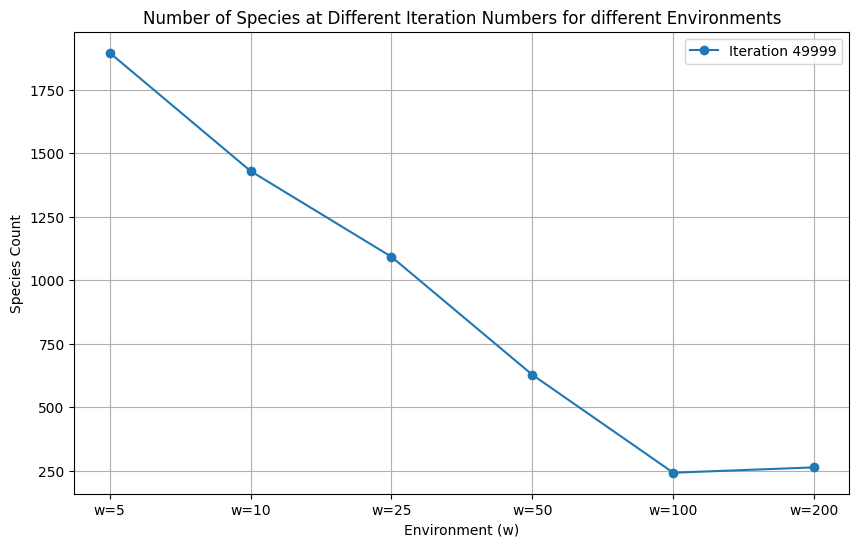

In [36]:
# teration numbers for whihc I want the graph
iteration_numbers = [49999]

# Create a list to store species counts at each iteration number
species_counts_at_iterations = []

# Loop through the iteration numbers
for iteration_number in iteration_numbers:
    species_counts_at_iteration = []

    # Loop through the folders
    for average_data in average_dataframes:
        # Find the row where Iteration_number matches the current iteration number
        row_at_iteration = average_data[average_data['Iteration_number'] == iteration_number]

        # Append the corresponding Species_count to the list
        if not row_at_iteration.empty:
            species_counts_at_iteration.append(row_at_iteration['Species_count'].values[0])
        else:
            # case where there is no data for the current iteration number, although there should always be
            species_counts_at_iteration.append(None)

    # Append the species counts at the current iteration number to the main list
    species_counts_at_iterations.append(species_counts_at_iteration)

# Plot the data
plt.figure(figsize=(10, 6))
for i, iteration_number in enumerate(iteration_numbers):
    plt.plot(folder_labels, species_counts_at_iterations[i], marker='o', label=f'Iteration {iteration_number}')

plt.title('Number of Species at Different Iteration Numbers for different Environments')
plt.xlabel('Environment (w)')
plt.ylabel('Species Count')
plt.legend()
plt.grid(True)
plt.show()


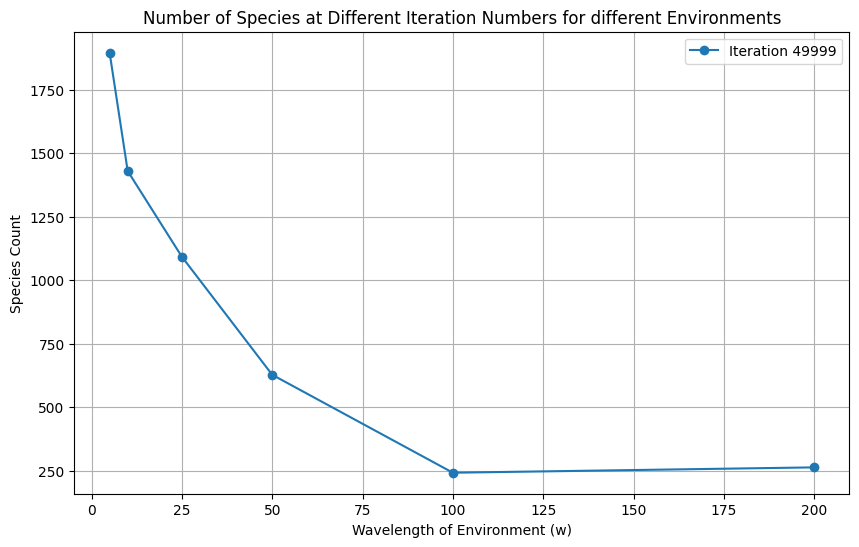

In [43]:
# Define numerical values corresponding to each w
w_values = [5, 10, 25, 50, 100, 200]

# Create a list to store species counts at each iteration number
species_counts_at_iterations = []
iteration_numbers = [49999]

# Loop through the iteration numbers
for iteration_number in iteration_numbers:
    species_counts_at_iteration = []

    # Loop through the folders
    for average_data in average_dataframes:
        # Find the row where Iteration_number matches the current iteration number
        row_at_iteration = average_data[average_data['Iteration_number'] == iteration_number]

        # Append the corresponding Species_count to the list
        if not row_at_iteration.empty:
            species_counts_at_iteration.append(row_at_iteration['Species_count'].values[0])
        else:
            # Handle the case where there is no data for the current iteration number
            species_counts_at_iteration.append(None)

    # Append the species counts at the current iteration number to the main list
    species_counts_at_iterations.append(species_counts_at_iteration)

# Plot the data
plt.figure(figsize=(10, 6))
for i, iteration_number in enumerate(iteration_numbers):
    plt.plot(w_values, species_counts_at_iterations[i], marker='o' ,label=f'Iteration {iteration_number}')

plt.title('Number of Species at Different Iteration Numbers for different Environments')
plt.xlabel('Wavelength of Environment (w)')
plt.ylabel('Species Count')
plt.legend()
plt.grid(True)
plt.show()


Columns in REvoSim_log_run_0002.txt: Index(['Iteration_number', 'Number_living_organisms', 'Species_count'], dtype='object')
Columns in REvoSim_log_run_0000.txt: Index(['Iteration_number', 'Number_living_organisms', 'Species_count'], dtype='object')
Columns in REvoSim_log_run_0001.txt: Index(['Iteration_number', 'Number_living_organisms', 'Species_count'], dtype='object')


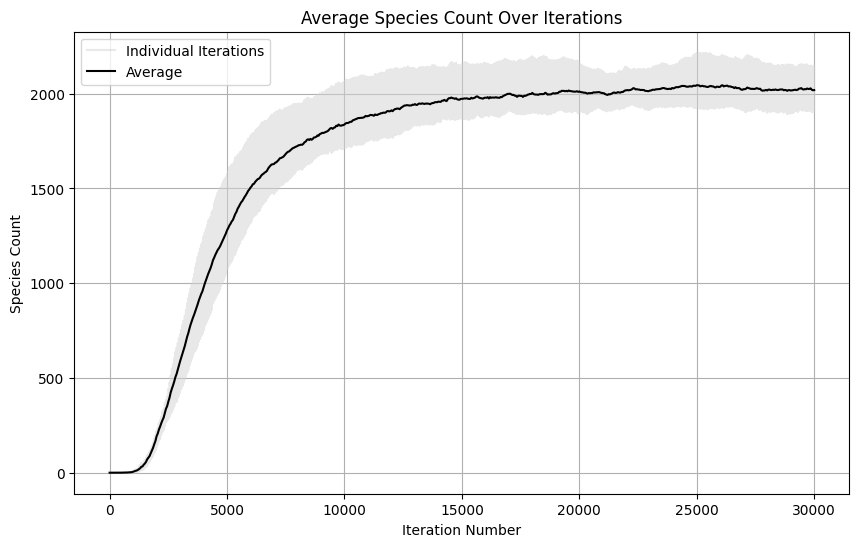

In [17]:
# The following is just to assesed if 30000 iterations is enough to reach plateau
#Define the folder containing your CSV files
folder_path = '/Users/gb4818/Desktop/batchof3w5'

# reate a list to store individual DataFrames
dataframes = []

#Loop through each file in the folder and read it into a DataFrame
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        
        # Specify the correct separator based on your data
        df = pd.read_csv(file_path, sep=',')  # Adjust the separator if necessary
        dataframes.append(df)
        
        # Print column names for each file
        print(f"Columns in {filename}: {df.columns}")

# Concatenate all DataFrames into one
all_data = pd.concat(dataframes, ignore_index=True)

#Sort the DataFrame by 'Iteration_number'
all_data = all_data.sort_values(by='Iteration_number')

# Group by 'Iteration_number' and calculate the average 'Species_count'
average_data = all_data.groupby('Iteration_number')['Species_count'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(all_data['Iteration_number'], all_data['Species_count'], color='lightgray', alpha=0.5, label='Individual Iterations')
plt.plot(average_data['Iteration_number'], average_data['Species_count'], color='black', label='Average')
plt.title('Average Species Count Over Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Species Count')
plt.legend()
plt.grid(True)
plt.show()